<a href="https://colab.research.google.com/github/GavenDcosta/ML_codes/blob/main/smart_grid_SVM_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import seaborn as sns



In [42]:
# Load the dataset
url = '/content/smart_grid_stability_augmented.csv'
data = pd.read_csv(url)

# Display the first few rows of the dataset
print(data.head())

# Check for NaN values in the dataset
print("NaN values in dataset:\n", data.isna().sum())

# Check unique values in the 'stabf' column
print("Unique values in 'stabf' column:", data['stabf'].unique())

# Drop NaN values from 'stabf' before mapping
data.dropna(subset=['stabf'], inplace=True)

# Map the target variable 'stabf' to numerical values
mapping = {'unstable': 0, 'stable': 1}
data['stab'] = data['stabf'].map(mapping)

# Check for any NaN values after mapping
print("NaN values in target after mapping:\n", data['stab'].isna().sum())

# Drop rows with NaN in 'stab' after mapping
data.dropna(subset=['stab'], inplace=True)



       tau1      tau2      tau3      tau4        p1        p2        p3  \
0  2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1  9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2  8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3  0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4  3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   

         p4        g1        g2        g3        g4      stab     stabf  
0 -1.723086  0.650456  0.859578  0.887445  0.958034  0.055347  unstable  
1 -1.255012  0.413441  0.862414  0.562139  0.781760 -0.005957    stable  
2 -0.920492  0.163041  0.766689  0.839444  0.109853  0.003471  unstable  
3 -0.997374  0.446209  0.976744  0.929381  0.362718  0.028871  unstable  
4 -0.554305  0.797110  0.455450  0.656947  0.820923  0.049860  unstable  
NaN values in dataset:
 tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4  

In [43]:
# Split the dataset into features and target variable
X = data.drop(['stab', 'stabf'], axis=1)  # Remove both stab and stabf columns from features
y = data['stab']

# Apply one-hot encoding if necessary
X = pd.get_dummies(X, drop_first=True)  # Drop first to avoid dummy variable trap

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [44]:
# Initialize the classifiers
svm_classifier = SVC(probability=True, random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifiers
svm_classifier.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)

# Make predictions
svm_predictions = svm_classifier.predict(X_test)
rf_predictions = rf_classifier.predict(X_test)

# Evaluate the classifiers
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)

print("SVM Classification Report:\n", classification_report(y_test, svm_predictions))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))



SVM Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94     11478
           1       0.92      0.88      0.90      6522

    accuracy                           0.93     18000
   macro avg       0.93      0.92      0.92     18000
weighted avg       0.93      0.93      0.93     18000

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     11478
           1       0.94      0.90      0.92      6522

    accuracy                           0.94     18000
   macro avg       0.94      0.93      0.94     18000
weighted avg       0.94      0.94      0.94     18000



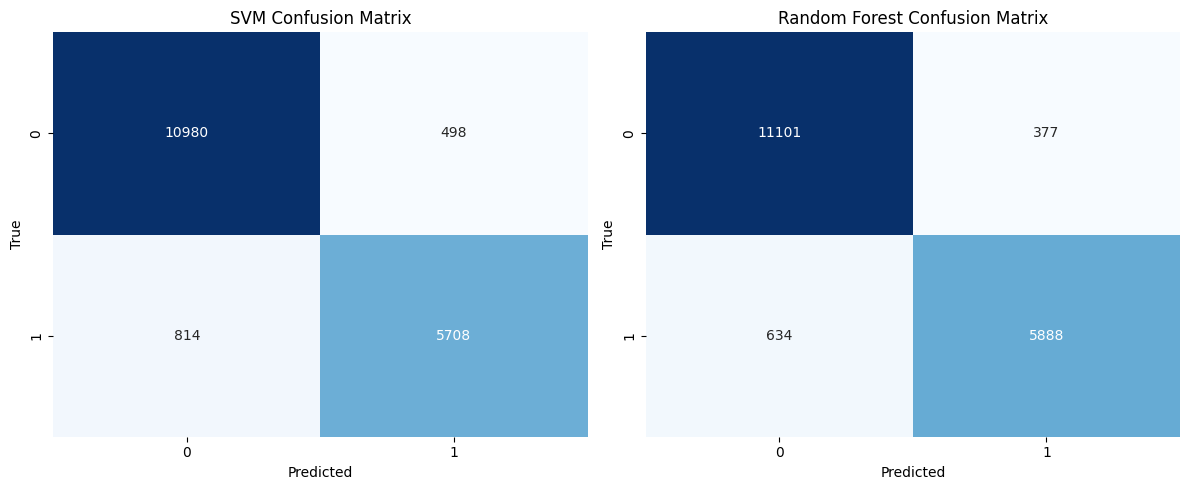

In [45]:
# Plot confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', ax=ax[0], cmap='Blues', cbar=False)
ax[0].set_title('SVM Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('True')

sns.heatmap(rf_conf_matrix, annot=True, fmt='d', ax=ax[1], cmap='Blues', cbar=False)
ax[1].set_title('Random Forest Confusion Matrix')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('True')

plt.tight_layout()
plt.show()




In [46]:
# Calculate ROC curve and AUC for SVM
svm_probs = svm_classifier.predict_proba(X_test)[:, 1]
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
svm_auc = roc_auc_score(y_test, svm_probs)

# Calculate ROC curve and AUC for Random Forest
rf_probs = rf_classifier.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = roc_auc_score(y_test, rf_probs)



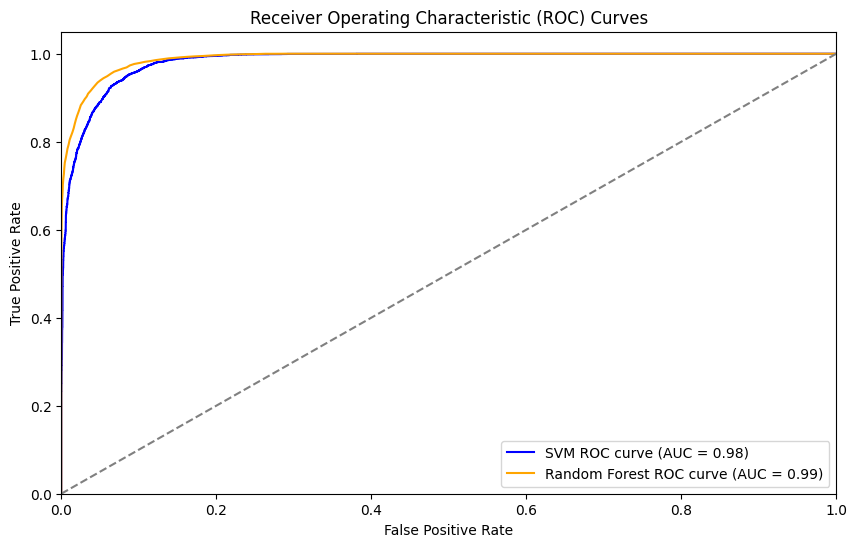

In [47]:
# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(svm_fpr, svm_tpr, color='blue', label=f'SVM ROC curve (AUC = {svm_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, color='orange', label=f'Random Forest ROC curve (AUC = {rf_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()